# Assignment 1.1
`
Name: Isaack Karanja  
Date: Monday, January 16, 2023`

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

# Import libraries

In [1]:
# Import necessary libraries - common libraries include pandas, numpy, matplotlib, and sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
from scipy import stats
from sklearn.linear_model import LinearRegression

## **Problem # 1.1.** 
In the 2018 election for Senate in California, a CNN exit poll of 1882 voters stated that 52.5% voted for the Democratic candidate, Diane Feinstein. Of all 11.1 million voters, 54.2% voted for Feinstein.

(a) What was the (i) subject, (ii) sample, (iii) population? 


`(a) Your answer goes here`

`a) i) subject -> California voters  
a) ii) sample -> 1882 Exit pol voters  
a) iii) population -> 1.1 million voters  `

## **Problem # 1.2.** 
The `Students` data file at [http://stat4ds.rwth-aachen.de/data/Students.dat](http://stat4ds.rwth-aachen.de/data/Students.dat) responses of a class of 60 
social science graduate students at the University of Florida to a questionnaire that asked about *gender* (1 = female, 0 = male), *age*, *hsgpa* = high school GPA (on a four-point scale), cogpa = college GPA, *dhome* = distance (in miles) of the campus from your home town, *dres* = distance (in miles) of the classroom from your current residence, *tv* = average number of hours per week that you watch TV, *sport* = average number of hours per week that you participate in sports or have other physical exercise, *news* = number of 
times a week you read a newspaper, *aids* = number of people you know who have died from AIDS or who 
are HIV+, *veg* = whether you are a vegetarian (1 = yes, 0 = no), *affil* = political affiliation (1 = Democrat, 2 
= Republican, 3 = independent), *ideol* = political ideology (1 = very liberal, 2 = liberal, 3 = slightly liberal, 4 
= moderate, 5 = slightly conservative, 6 = conservative, 7 = very conservative), *relig* = how often you 
attend religious services (0 = never, 1 = occasionally, 2 = most weeks, 3 = every week), *abor* = opinion 
about whether abortion should be legal in the first three months of pregnancy (1 = yes, 0 = no), *affirm* = 
support affirmative action (1 = yes, 0 = no), and *life* = belief in life after death (1 = yes, 2 = no, 3 = 
undecided). You will use this data file for some exercises in this book. 


(a) Practice accessing a data file for statistical analysis with your software by going to the book’s 
     website and copying and then displaying this data file.


`(a) Your answer goes here`

In [2]:
# Read in the Students data file
students = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Students.dat', sep='\s+')

# View the first few 10 rows of the dataset
students.head(10)

,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2
5,6,0,39,3.5,3.5,350,3.0,4.0,5,7,0,1,1,2,1,1,1,3
6,7,0,24,3.6,3.7,0,0.2,5.0,12,4,2,0,3,2,1,1,1,1
7,8,1,31,3.0,3.0,5000,1.5,5.0,3,3,1,0,3,2,1,1,1,1
8,9,0,34,3.0,3.0,5000,2.0,7.0,5,3,0,0,3,1,1,1,1,3
9,10,0,28,4.0,3.1,900,2.0,1.0,1,2,1,1,3,3,0,0,1,1


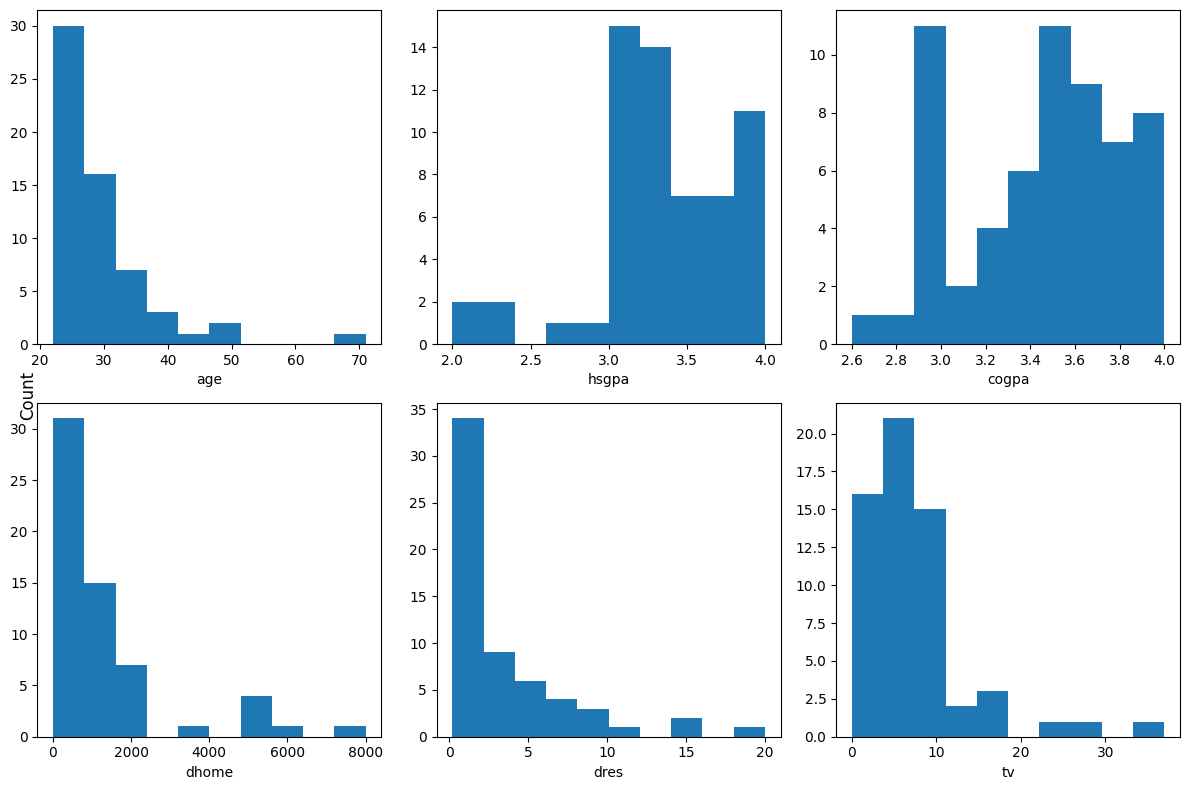

In [3]:
# Plotting function for continuous variables
def continuous_plots(df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(12,8))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        df[columns[i]].hist(ax=ax, grid=False)
        ax.set_xlabel(columns[i])
    fig.tight_layout()
    fig.supylabel('Count')
    plt.show()
# Plot continuous variables
continuous_plots(students, ['age', 'hsgpa', 'cogpa', 'dhome', 'dres', 'tv'], 3)

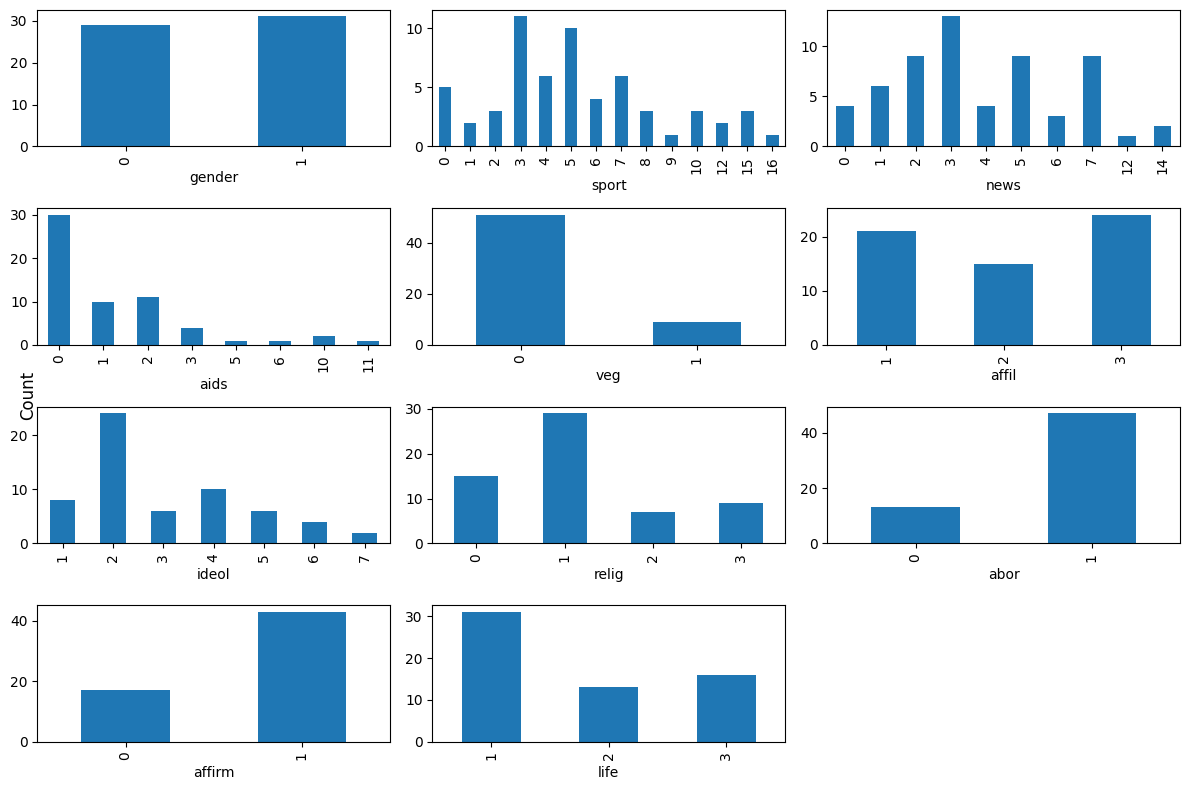

In [4]:
# Plotting function for discrete variables
def discrete_plots(df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(12,8))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        df[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_xlabel(columns[i])
    fig.tight_layout()
    fig.supylabel('Count')
    plt.show()# Plot discrete variables
discrete_plots(students, ['gender', 'sport', 'news', 'aids', 'veg', 'affil', 'ideol', 'relig', 'abor', 'affirm', 'life'], 3)

(b) Using responses on *abor*, state a question that could be addressed with (i) descriptive 
     statistics, (ii) inferential statistics.


In [5]:
# Calculate summary statistics on abor
students.describe()["abor"]

count    60.000000
mean      0.783333
std       0.415450
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: abor, dtype: float64

`Question that can be addressed using descriptive statistics: What is the percentage of people who think abortion should be legal in the first three months of pregnancy?`

`Question that can be addressed using inference statistics: Do people who think abortion should be legal in the first three months of pregnancy differ in their opinions in affirmative action?`

## **Problem # 1.3.** 
Identify each of the following variables as categorical or quantitative: (a) Number of smartphones that you own; (b) County of residence; (c) Choice of diet (vegetarian, nonvegetarian); (d) Distance, in kilometers, commute to work

`Your answer goes here`

`(a) Number of smartphones that you own; quantitative  
(b) County of residence; categorical  
(c) Choice of diet (vegetarian, nonvegetarian); categorical  
(d) Distance, in kilometers, commute to work; quantitative  `

## **Problem # 1.4.** 
Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous

`Your answer goes here`

`(a) categorical; race  
(b) quantitative;  age  
(c) discrete: number of cats  
(d) continuous: time `

## **Problem # 1.10.** 
Analyze the `Carbon_West` ([http://stat4ds.rwth-aachen.de/data/Carbon_West.dat](http://stat4ds.rwth-aachen.de/data/Carbon_West.dat)) data file at the book’s website by **(a)** constructing a frequency distribution and  a histogram, **(b)** finding the mean, median, and standard deviation. Interpret each.

`(a)`

In [6]:
# Read in the Carbon_West data file into a panda's dataframe
carbon_west = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Carbon_West.dat', sep='\s+')
carbon_west.head()

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


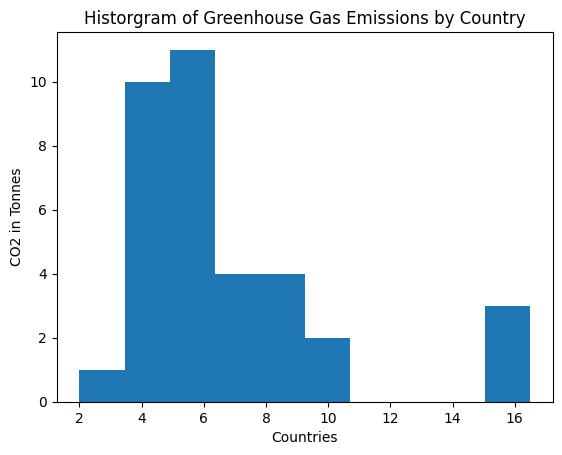

In [7]:
# Construct a histogram
carbon_west.hist(["CO2"], grid=False)
plt.xlabel("Countries")
plt.ylabel("CO2 in Tonnes")
plt.title("Historgram of Greenhouse Gas Emissions by Country")
plt.show()

`(b) Your answer goes here`

In [8]:
# Find out the mean and median of of the data
print("Mean :", carbon_west["CO2"].mean().round(2))
print("Median :", carbon_west["CO2"].median().round(2))
print("Standard deviation :", carbon_west["CO2"].std().round(2))

Mean : 6.72
Median : 5.9
Standard deviation : 3.36


In [9]:
print('Difference Between Mean and Median =', (carbon_west["CO2"].mean() - carbon_west["CO2"].median()).round(2)) 

Difference Between Mean and Median = 0.82


`On checking the Difference Between Mean and Median, we find it to be 0.82. Since both the mean and the median values are fairly close together, the data appears to be normally distributed with a slight positive skew `

## **Problem # 1.11.** 
According to Statistics Canada, for the Canadian population having income in 2019, annual income had a median of `$`35,000 and mean of `$`46,700. What would you predict about the shape of the distribution? Why?


`The difference between the the Mean and Median is $10,000. Since the mean is greater, the distribution have a siginificant positive skewed with more people having a lower income. `

## **Problem # 1.13.**
A report indicates that public school teacher’s annual salaries in New York city have an approximate  mean of `$`69,000 and standard deviation of `$`6,000. If the distribution has approximately a bell shape, report intervals that contain about (a) 68%, (b) 95%, (c) all or nearly all salaries. Would a salary of  `$`100,000 be unusual? Why? 

In [10]:
#1st standard deviation (68%)
first_lower = 69000 - 6000
first_upper = 69000 + 6000

`(a)68% of salaries are between $63,000   and $75,000.`

In [11]:
#2st standard deviation (95%)
second_lower = 69000 - 2*6000
second_upper = 69000 + 2*6000

`(b) 95% of salaries are between $57,000 and $81,000.`

In [12]:
#3st standard deviation (nearly all salaries)
third_lower = 69000 - 3*6000
third_upper = 69000 + 3*6000

`(c) All or nearly all salaries are between $51,000 and $87,000.`

In [13]:
Q3 = 69000+(0.675+6000)
IQR = 1.35*6000
OUTLIER = Q3 + 1.5*IQR
OUTLIER

87150.675

`$100,000 would be an outlier since it is greater than the Q3+1.5 x 1QR since distribution has approximately a bell shape.`

## **Problem # 1.17.** 
From the `Murder` data file ([http://stat4ds.rwth-aachen.de/data/Murder.dat](http://stat4ds.rwth-aachen.de/data/Murder.dat)) at the book’s website, use the variable murder, which is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). Using software:  
(a) Find the mean and standard deviation and interpret their values.  
(b) Find the five-number summary, and construct the corresponding box plot. Interpret.  
(c) Now include the observation for D.C. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

**Answer:**

`(a) Your answer goes here` 

In [14]:
# Read in the Murder data file into a panda's dataframe
murder = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Murder.dat', sep='\s+')
murder_non_dc = murder[murder["state"] != ("DC") ]
murder_non_dc.head(5)

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


In [15]:
# Find out the mean and median of of the data
print("Mean :", murder_non_dc["murder"].mean().round(2))
print("Standard deviation :", murder_non_dc["murder"].std().round(2))

Mean : 4.87
Standard deviation : 2.59


`(b) Your answer goes here`

In [16]:
# Calculate the five-number summary using describe 
murder_non_dc.describe().T.drop(columns=["count"]).round(2)

,mean,std,min,25%,50%,75%,max
murder,4.87,2.59,1.0,2.62,4.85,6.18,12.4


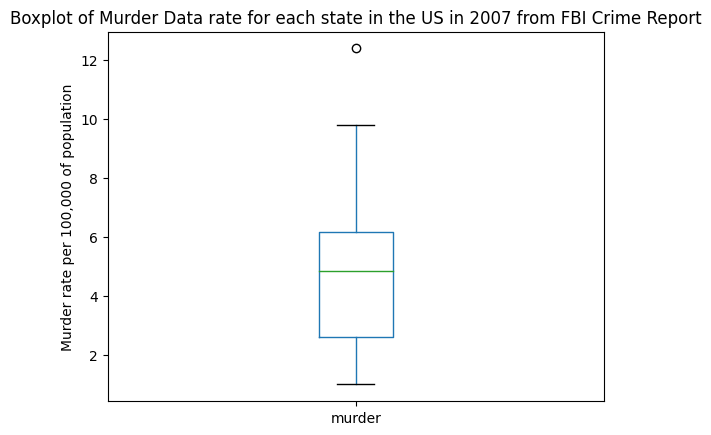

In [17]:
# Plot the box plot
murder_non_dc.boxplot(grid = False) 
plt.title ('Boxplot of Murder Data rate for each state in the US in 2007 from FBI Crime Report') # title
plt.ylabel('Murder rate per 100,000 of population')                    # y-axis
plt.show()

`(c) Your answer goes here` 

In [18]:
# Include DC data into the murder data
# Show the five-number summary
murder.describe().T.drop(columns=["count"]).round(2)

,mean,std,min,25%,50%,75%,max
murder,5.25,3.73,1.0,2.65,5.0,6.45,24.2


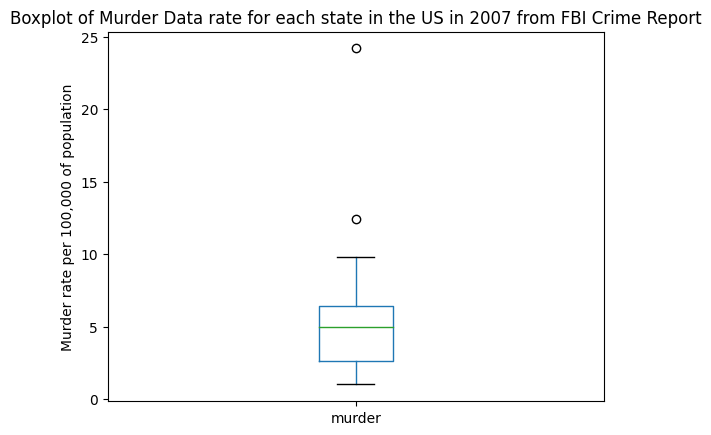

In [19]:
# Plot the box plot
murder.boxplot(grid = False ) # re-orient
plt.title ('Boxplot of Murder Data rate for each state in the US in 2007 from FBI Crime Report') # title
plt.ylabel('Murder rate per 100,000 of population')                    # y-axis
plt.show()

## **Problem # 1.18.**
The `Income` data file ([http://stat4ds.rwth-aachen.de/data/Income.dat](http://stat4ds.rwth-aachen.de/data/Income.dat)) at the book’s website reports annual income values in the U.S., in thousands of dollars.

(a) Using software, construct a histogram. Describe its shape.  
(b) Find descriptive statistics to summarize the data. Interpret them.  
(c) The kernel density estimation method finds a smooth-curve approximation for a histogram. At each value, it takes into account how many observations are nearby and their distance, with more weight given those closer. Increasing the bandwidth increases the influence of observations further away. Plot a smooth-curve approximation for the histogram of income values. Summarize the impact of increasing and of decreasing the bandwidth substantially from the default value.  
(d) Construct and interpret side-by-side box plots of income by race (B = Black, H = Hispanic, W = White).  Compare the incomes using numerical descriptive statistics

**Answer:**

`(a) Your answer goes here`

In [20]:
# Read in the Income data file into a panda's dataframe
income = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Income.dat', sep='\s+')
income.head()

,income,education,race
0,16,10,B
1,18,7,B
2,26,9,B
3,16,11,B
4,34,14,B


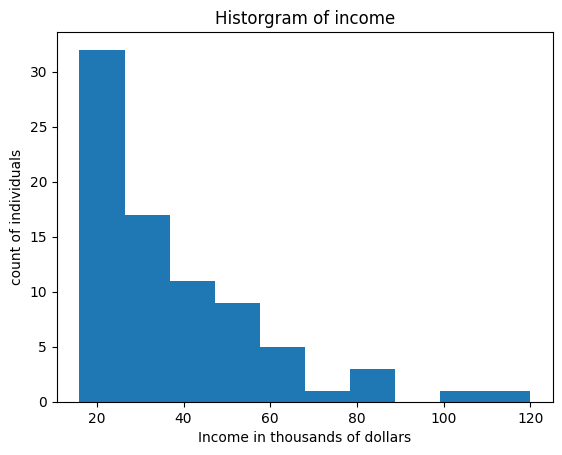

In [21]:
# Construct a histogram
income.hist(["income"], grid=False)
plt.xlabel("Income in thousands of dollars")
plt.ylabel("count of individuals")
plt.title("Historgram of income")
plt.show()

`Describe its shape: The Histogram does not show uniform distributation, instead it shows high distribution of subejcts with lower income and low distribution of subjects with higher income.`

`(b) Your answer goes here`

In [22]:
# Show the five-number summary
income.describe().T.drop(columns=["count"]).round(2).drop(index=["education"]) #drop count column, drop education row

,mean,std,min,25%,50%,75%,max
income,37.52,20.67,16.0,22.0,30.0,46.5,120.0


`Interprate its results. The five number summary shows outliers high earners who are beyond the Q3+1.5x IQR but no low income outliers`

**Summary of the data:**  

`(d) Your answer goes here`

In [23]:
# Black Income descriptive
income_black = income[income["race"] == ("B") ].drop(columns=["education","race"])
income_black.describe().round(2).drop(index=["count"]).T

,mean,std,min,25%,50%,75%,max
income,27.75,13.28,16.0,19.5,24.0,31.0,66.0


In [24]:
# Hispanic Income descriptive
income_hispanic = income[income["race"] == ("H") ].drop(columns=["education","race"])
income_hispanic.describe().round(2).drop(index=["count"]).T

,mean,std,min,25%,50%,75%,max
income,31.0,12.81,16.0,20.5,30.0,32.0,58.0


In [25]:
# White Income descriptive
income_white = income[income["race"] == ("W") ].drop(columns=["education","race"])
income_white.describe().round(2).drop(index=["count"]).T

,mean,std,min,25%,50%,75%,max
income,42.48,22.87,18.0,24.0,37.0,50.0,120.0


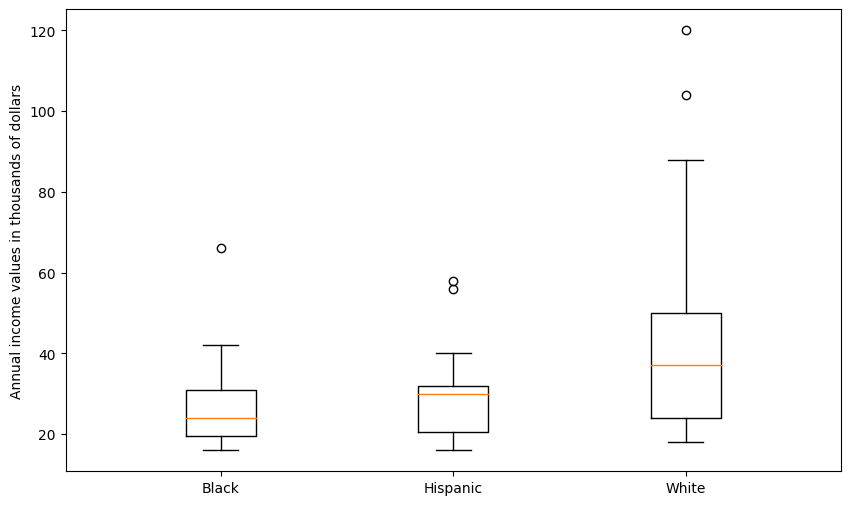

In [26]:
# Plots side by side
data_to_plot = [ income_black["income"], income_hispanic["income"], income_white["income"]]
plt.figure(figsize=(10, 6))
plt.ylabel('Annual income values in thousands of dollars') 
box = plt.boxplot(data_to_plot,
                  positions=[1, 1.75, 2.5 ],
                  labels=['Black','Hispanic','White'])


In [35]:
income_black["income"]

0     16
1     18
2     26
3     16
4     34
5     22
6     42
7     42
8     16
9     20
10    66
11    26
12    20
13    30
14    20
15    30
Name: income, dtype: int64

## **Problem # 1.19.** 
The `Houses` data file ([http://stat4ds.rwth-aachen.de/data/Houses.dat](http://stat4ds.rwth-aachen.de/data/Houses.dat)) at the book’s website lists the selling price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let’s analyze the selling prices. 

(a) Construct a frequency distribution and a histogram. Describe the shape.  
(b) Find the percentage of observations that fall within one standard deviation of the mean. Why is this not close to 68%?  
(c) Construct a box plot, and interpret.   
(d) Use descriptive statistics to compare selling prices according to whether the house is new. 




**Answer:**

`(a) Your answer goes here`

In [27]:
# Read in the Housing data file into a panda's dataframe
houses = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Houses.dat', sep='\s+')
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


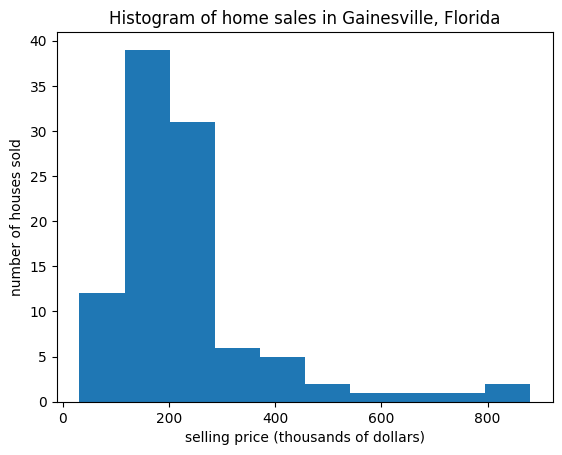

In [28]:
# Construct a histogram
houses.hist(["price"], grid=False)
plt.xlabel("selling price (thousands of dollars)")
plt.ylabel("number of houses sold")
plt.title("Histogram of home sales in Gainesville, Florida")
plt.show()

`The histogram does not show uniform distribution, instead we see that majority of the homes sold in  Gainesville, Florida fell within $100 - $200K range `

`(b) Your answer goes here`

In [29]:
# Standard Deviation 
houses.describe().T.drop(columns=["count"]).round(2).drop(index=["case","size","new","taxes", "bedrooms", "baths"]) #drop count column, drop case,size,new,taxes, bedrooms, baths rows

,mean,std,min,25%,50%,75%,max
price,233.0,151.89,31.5,139.84,198.9,254.44,880.5


In [30]:
# Use the Zcore function to identify how far away each obsevations is from the  standard deviations.
def zscore(s):
    return (s - np.mean(s)) / np.std(s)

# Check if the value is within 1 standard deviation and sum it / divide by total number of observations as a percentage

print( sum(zscore(houses["price"]) < 1)/len(houses)*100, "% ")

89.0 % 


`Why is this not close to 68%?: Becuase the prices are heavity skewed and the data is very asymetric. Therefore it does not follow the Empirical Rule.`

`(c) Your answer goes here`

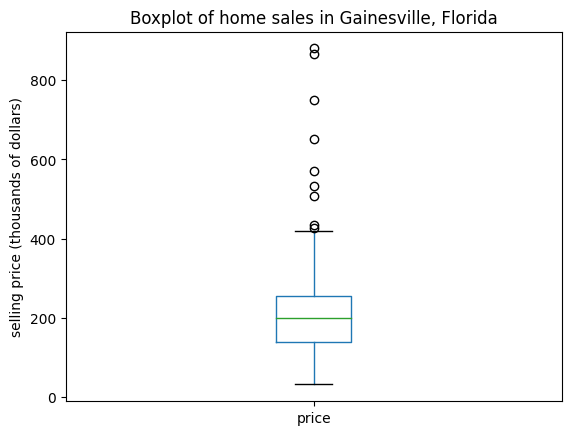

In [31]:
# Plot the box plot
houses.boxplot(["price"],grid = False, ) 
plt.title ('Boxplot of home sales in Gainesville, Florida') # title
plt.ylabel('selling price (thousands of dollars)')                    # y-axis
plt.show()

`The box plot shows the distribution of home sales in Gainesville, Florida. The median sale is 198.9, and the interquartile range is between 139.84 and 198.9. There 11 many outliers, with prices above $400,000`

`(d) Your answer goes here`

In [32]:
#The five number summary for prices for new houses 
houses_new = houses[houses["new"] == 1 ]
houses_new.describe().T.drop(columns=["count"]).round(2).drop(index=["case","size","new","taxes", "bedrooms", "baths"]) #drop count column, drop case,size,new,taxes, bedrooms, baths rows

,mean,std,min,25%,50%,75%,max
price,436.45,219.83,158.85,256.95,427.5,519.67,866.25


In [33]:
#The five number summary for prices for old houses 
houses_old = houses[houses["new"] == 0 ]
houses_old.describe().T.drop(columns=["count"]).round(2).drop(index=["case","size","new","taxes", "bedrooms", "baths"]) #drop count column, drop case,size,new,taxes, bedrooms, baths rows

,mean,std,min,25%,50%,75%,max
price,207.85,121.04,31.5,135.0,190.8,240.0,880.5


`Compare selling price: Old houses sold for an average price of $228,000 lower than new houses. They also had a significantly lower starting price ($31,000) compared to new houses ($158,000) although on the higher end, there was not a siginficant variation in price `